In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\archive\\spotify-2023.csv",encoding='ISO-8859-1')

In [3]:
data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [4]:
data.shape

(953, 24)

In [5]:
data.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [6]:
data['streams'].replace('non', pd.NA)

0      141381703
1      133716286
2      140003974
3      800840817
4      303236322
         ...    
948     91473363
949    121871870
950     73513683
951    133895612
952     96007391
Name: streams, Length: 953, dtype: object

In [7]:
streams_null = pd.to_numeric(data['streams'], errors='coerce').isnull()
data[streams_null]


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,110,A,Major,53,75,69,7,0,17,3


In [8]:
in_deezer_playlists_null = pd.to_numeric(data['in_deezer_playlists'], errors='coerce').isnull()
print(data[in_deezer_playlists_null]['in_deezer_playlists'].head())
print('Total data notnull:',data[in_deezer_playlists_null]['in_deezer_playlists'].notnull().sum())
print('Total data null:',data[in_deezer_playlists_null]['in_deezer_playlists'].isnull().sum())

48    2,445
54    3,394
55    3,421
65    4,053
73    1,056
Name: in_deezer_playlists, dtype: object
Total data notnull: 79
Total data null: 0


In [9]:
deezer_playlists =[]
for i in data['in_deezer_playlists']:
    if ',' in i:
        deezer_playlists.append(i.replace(',', ''))
    else:
        deezer_playlists.append(i)
data['in_deezer_playlists'] = deezer_playlists

In [10]:
in_shazam_charts_null = pd.to_numeric(data['in_shazam_charts'], errors='coerce').isnull()
print(data[in_shazam_charts_null]['in_shazam_charts'].head())
print('Total data notnull:', data[in_shazam_charts_null]['in_shazam_charts'].notnull().sum())
print('Total data null:', data[in_shazam_charts_null]['in_shazam_charts'].isnull().sum())

12    1,021
13    1,281
14      NaN
17    1,173
24    1,093
Name: in_shazam_charts, dtype: object
Total data notnull: 7
Total data null: 50


In [11]:
data['in_shazam_charts'] = data['in_shazam_charts'].str.replace(',','')

In [12]:
cols_num = ['streams', 'in_deezer_playlists', 'in_shazam_charts']
data[cols_num] = data[cols_num].apply(lambda x: pd.to_numeric(x, errors='coerce'))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    int64  
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      903 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   8

In [13]:
data.duplicated().any()

False

In [14]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.520000e+02,953.000000,953.000000,953.000000,953.000000,903.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.141374e+08,67.812172,51.908709,385.187828,2.666317,59.995570,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.668569e+08,86.441493,50.630241,1130.535561,6.035599,161.161093,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.416362e+08,13.000000,7.000000,13.000000,0.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.905309e+08,34.000000,38.000000,44.000000,0.000000,2.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738690e+08,88.000000,87.000000,164.000000,2.000000,37.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,12367.000000,58.000000,1451.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [15]:
data.describe(include='object')

,track_name,artist(s)_name,key,mode
count,953,953,858,953
unique,943,645,11,2
top,Daylight,Taylor Swift,C#,Major
freq,2,34,120,550


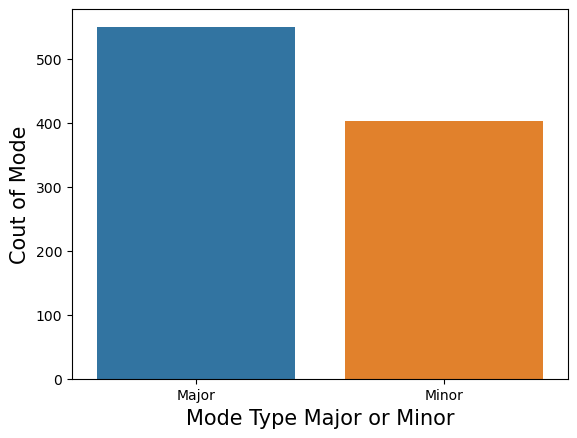

In [16]:
# Ploting Mode of songs 
sns.countplot(x='mode', data=data)
plt.xlabel("Mode Type Major or Minor",fontsize=15)
plt.ylabel("Cout of Mode",fontsize=15)
plt.show()

In [17]:
# retuning Max and Min streamed count 
print("Max Streamed count",data['streams'].max())
print("Minimum Streamd Count", data['streams'].min())

Max Streamed count 3703895074.0
Minimum Streamd Count 2762.0


# Top 5 Artist's 

In [23]:
# Top Artists 
top_artist = data.groupby('artist(s)_name')
top_artists = top_artist.agg({'streams':'sum'}).reset_index().sort_values('streams',ascending=False).head()

<Axes: xlabel='artist(s)_name', ylabel='streams'>

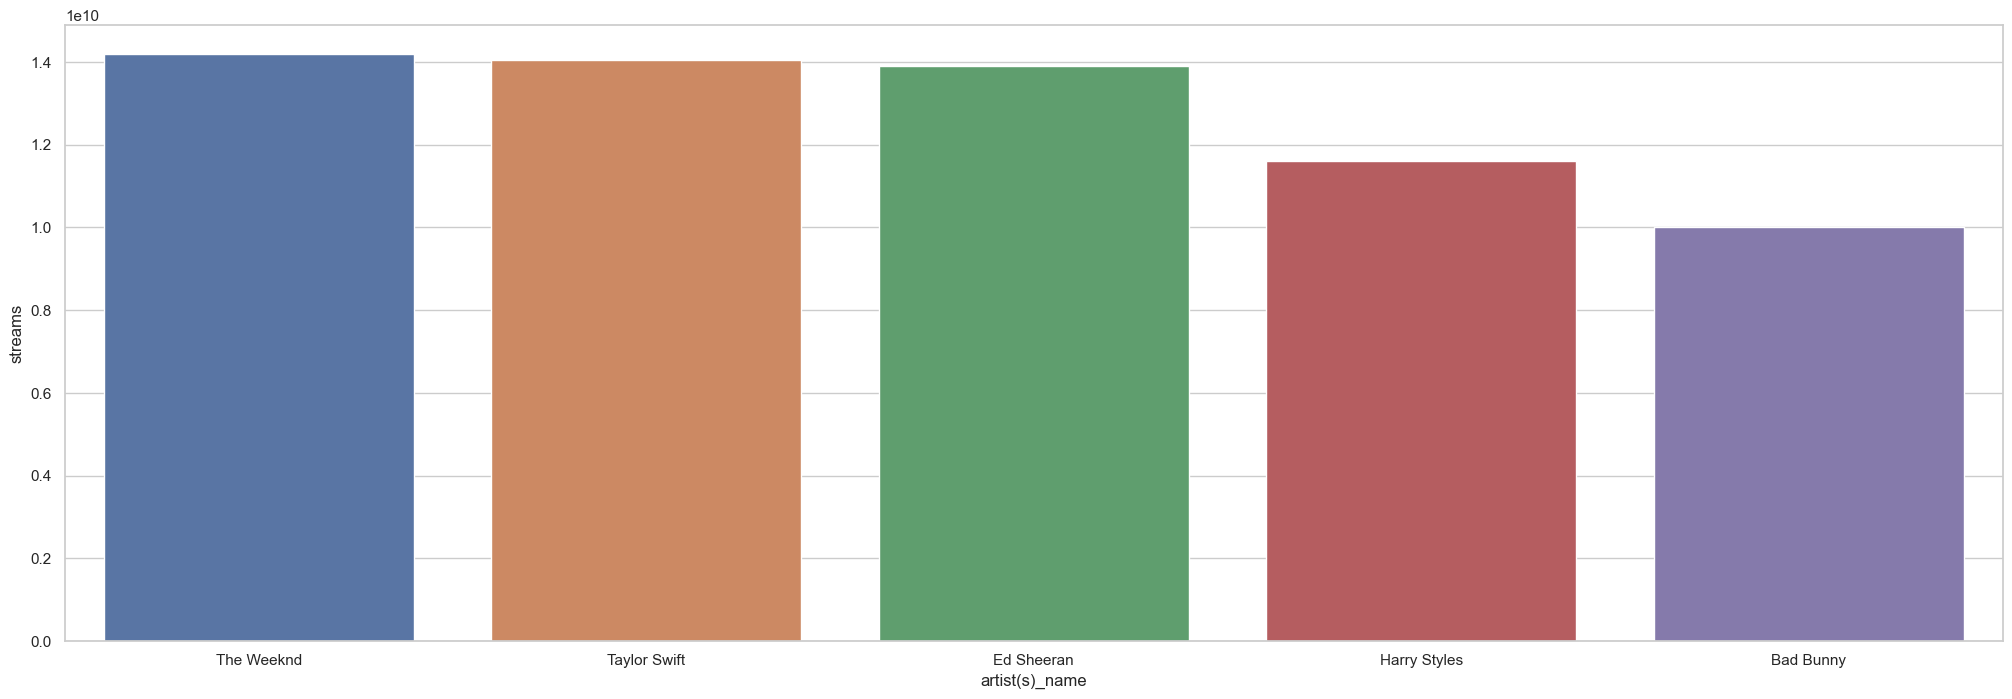

In [20]:
plt.figure(figsize=(25, 8))
sns.set(style='whitegrid')
sns.barplot(x='artist(s)_name',y='streams', data=top_artists)

# Top 5 Streamed tracks are 

Text(0, 0.5, 'Streamed Count of a Track in Y - Axis')

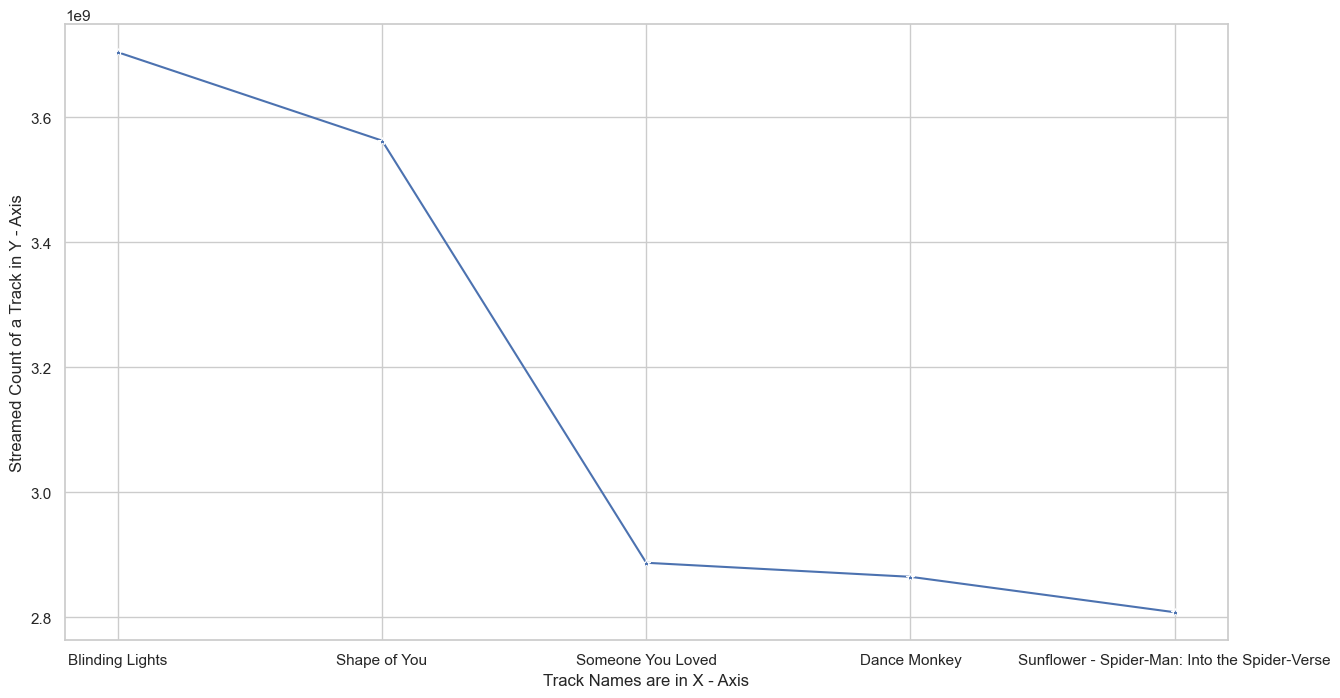

In [31]:
top_tracks = data.groupby("track_name").agg({'streams':'sum'}).reset_index().sort_values('streams', ascending=False).head(5)

plt.figure(figsize=(15, 8))
sns.set(style='whitegrid')
sns.lineplot(x='track_name',y='streams',data=top_tracks,marker="*")
plt.xlabel("Track Names are in X - Axis")
plt.ylabel("Streamed Count of a Track in Y - Axis")

In [24]:
top_tracks

,track_name,streams
100,Blinding Lights,3.703895e+09
693,Shape of You,3.562544e+09
723,Someone You Loved,2.887242e+09
184,Dance Monkey,2.864792e+09
753,Sunflower - Spider-Man: Into the Spider-Verse,2.808097e+09


Blinding Lights is a top streamed track with count ('3.703895e+09')

Thank You 😉